<a href="https://colab.research.google.com/github/mkosaka1/Speech_Emotion_Recognition/blob/master/3.%20Transfer_Learning%20-%20Initial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import os
import itertools

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers




# Labels

In [4]:
import glob
angry = glob.glob('/content/drive/My Drive/sorted_data/angry/*.*')
calm = glob.glob('/content/drive/My Drive/sorted_data/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/sorted_data/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/sorted_data/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/sorted_data/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/sorted_data/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/sorted_data/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/sorted_data/surprised/*.*')

In [5]:
data = []
labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Surprised')

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=22, stratify=labels)

# X_model, X_test, y_model, y_test = train_test_split(data, labels, test_size=0.3,random_state=22, stratify=labels)
# X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.3,random_state=22,stratify=y_model)

In [ ]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'angry': 
            label = 'angry'
        elif labels == 'calm':
            label = 'calm'
        elif labels == 'disgust':
            label = 'disgust'
        elif labels == 'fearful':
            label = 'fearful'
        elif labels == 'happy':
            label = 'happy'
        elif labels == 'neutral':
            label = 'neutral'
        elif labels == 'sad':
            label = 'sad'
        elif labels == 'surprised':
            label = 'surprised'
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(224,224)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            # image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=200) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {'angry':'angry', 'calm':'calm', 'disgust':'disgust', 'fearful':'fearful', 'happy':'happy', 'neutral':'neutral','sad':'sad','surprised':'surprised'}
    
    return labels[class_code]


In [ ]:
Images, Labels = get_images('/content/drive/My Drive/sorted_data/') #Extract the training images from the folders.

# Images = np.array(Images) #converting the list of images to numpy array.
# Labels = np.array(Labels)

IndexError: ignored

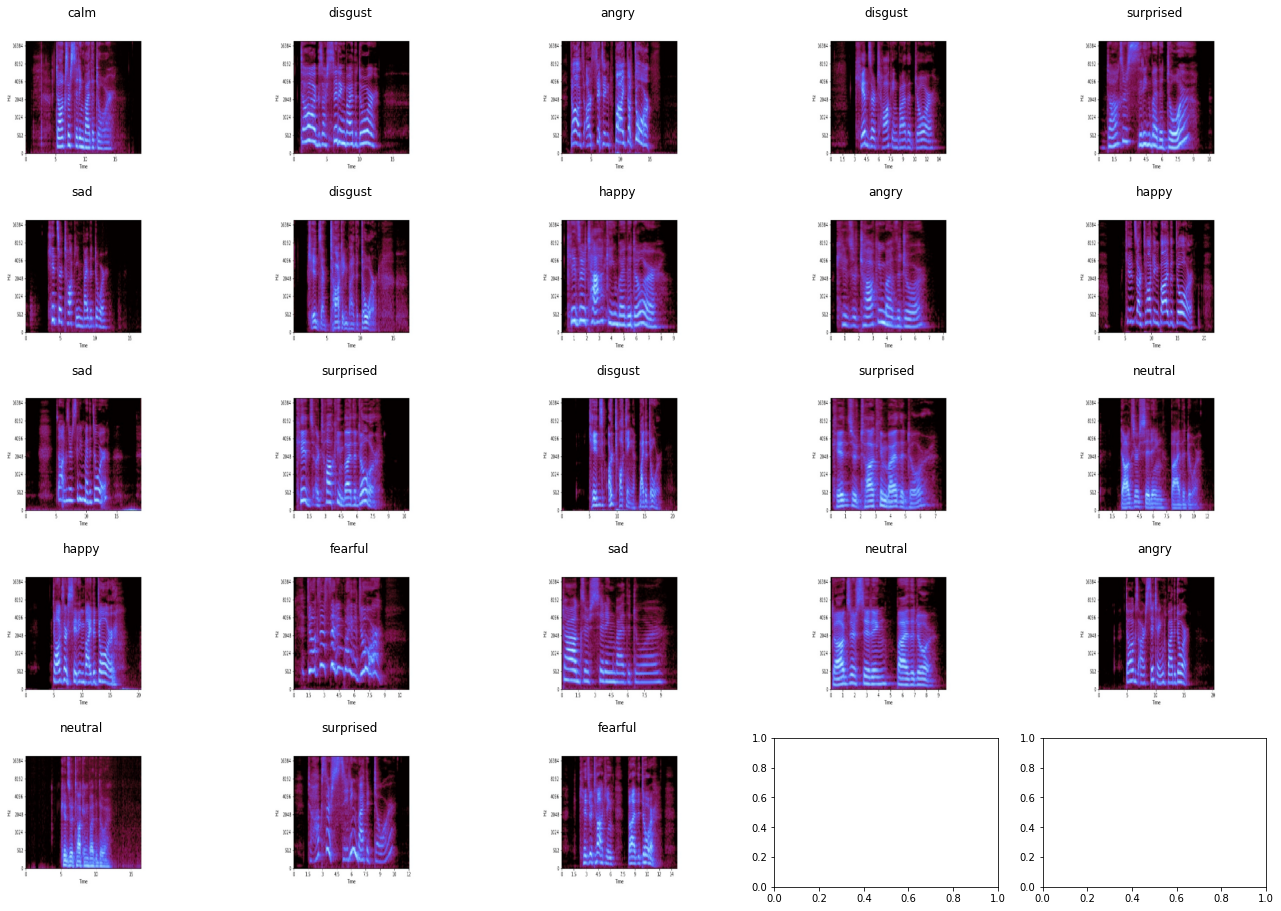

In [ ]:
from random import randint

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(Images, Labels, test_size=0.3,random_state=22, stratify=Labels)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.3,random_state=22,stratify=y_model)


In [ ]:
# Images = np.array(Images) #converting the list of images to numpy array.
# Labels = np.array(Labels)

In [8]:

# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1008, 224, 224, 3), y_train has a shape of (1008,)
X_test has a shape of (432, 224, 224, 3), y_test has a shape of (432,)


In [9]:

# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [11]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
for layer in transfer_model.layers[:19]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten True
20 dense True
21 dropout True
22 dense_1 True
23 dense_2 True


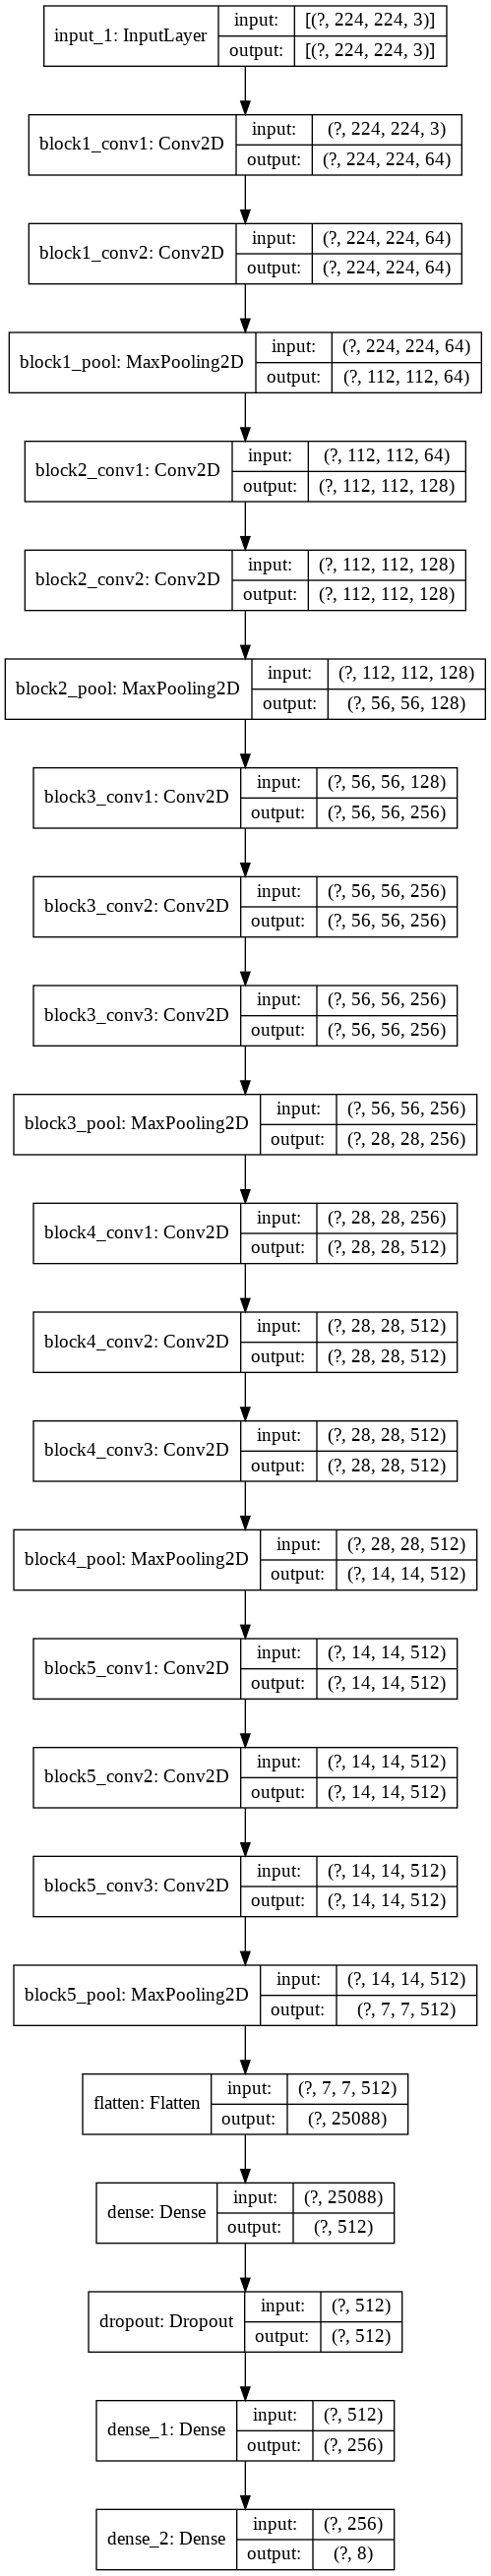

In [9]:
keras.utils.plot_model(transfer_model, show_shapes=True)

In [12]:

from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [ ]:

# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
1008/1008 [==============================] - 16s 15ms/step - loss: 2.1687 - accuracy: 0.1716 - val_loss: 1.9545 - val_accuracy: 0.2639
Epoch 2/100
1008/1008 [==============================] - 16s 15ms/step - loss: 1.9658 - accuracy: 0.2133 - val_loss: 1.8610 - val_accuracy: 0.2847
Epoch 3/100
1008/1008 [==============================] - 16s 16ms/step - loss: 1.8757 - accuracy: 0.2768 - val_loss: 1.7536 - val_accuracy: 0.4051
Epoch 4/100
1008/1008 [==============================] - 16s 16ms/step - loss: 1.7880 - accuracy: 0.3105 - val_loss: 1.6445 - val_accuracy: 0.4051
Epoch 5/100
1008/1008 [==============================] - 16s 16ms/step - loss: 1.6967 - accuracy: 0.3591 - val_loss: 1.5838 - val_accuracy: 0.4190
Epoch 6/100
1008/1008 [==============================] - 16s 16ms/step - loss: 1.6205 - accuracy: 0.3810 - val_loss: 1.5163 - val_accuracy: 0.4352
Epoch 7/100
1008/1008 [==============================] - 16s 16ms/step - loss: 1.5555 - accuracy: 0.3998 - val_loss: 1

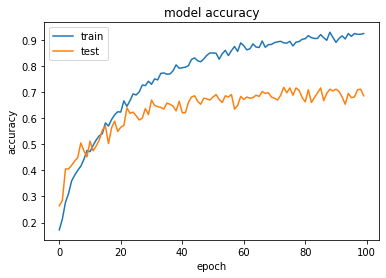

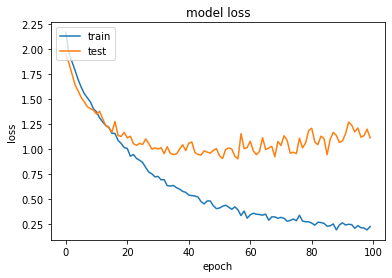

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

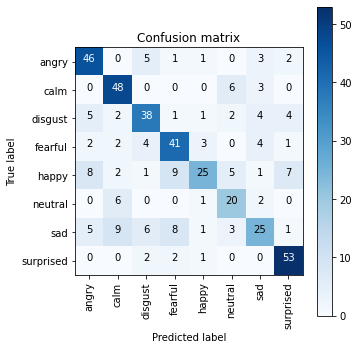

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.70      0.79      0.74        58
        calm       0.70      0.84      0.76        57
     disgust       0.68      0.67      0.67        57
     fearful       0.66      0.72      0.69        57
       happy       0.76      0.43      0.55        58
     neutral       0.56      0.69      0.62        29
         sad       0.60      0.43      0.50        58
   surprised       0.78      0.91      0.84        58

    accuracy                           0.69       432
   macro avg       0.68      0.69      0.67       432
weighted avg       0.69      0.69      0.67       432



In [13]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=8,
                                          verbose=1,
                                          mode='max',
                                          min_lr=1e-7)

# stop training when val_accuracy has stopped improving
early_stop = EarlyStopping(monitor='val_accuracy',
                                       patience=8,
                                       verbose=1,
                                       mode='max')

checkpoint = ModelCheckpoint('face_detector.h15', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)


In [21]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
# x = Dense(1024, activation='relu')(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.4)(x) # Dropout layer to reduce overfitting
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.4)(x) # Dropout layer to reduce overfitting

x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [22]:
for layer in transfer_model.layers[:19]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_5 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten_4 True
20 dense_14 True
21 dropout_5 True
22 dense_15 True
23 dense_16 True
24 dense_17 True


In [ ]:

train_datagen = ImageDataGenerator( 
                                   zoom_range=0.3, 
                                   rotation_range=40,
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   shear_range=0.1, 
                                   horizontal_flip=True, 
                                   fill_mode="nearest")

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=16)

# val_datagen = ImageDataGenerator(rescale=1./255)
                        
# val_generator = val_datagen.flow(X_test,
#                                  y_test,
#                                  batch_size=1)

# train_steps_per_epoch = X_train.shape[0] // 1
# val_steps_per_epoch = X_test.shape[0] // 1

# train_datagen.fit(X_train)
# val_datagen.fit(X_test)

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=train_steps_per_epoch,
                    validation_data=(X_test,y_test),
                    # validation_steps=val_steps_per_epoch,
                    epochs=100,
                    shuffle=True,
                    callbacks=[lr_reduce, checkpoint],
                    verbose=1)


Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 0.9943 - accuracy: 0.6121
Epoch 00001: val_loss did not improve from 1.11035
63/63 [==============================] - 14s 230ms/step - loss: 0.9943 - accuracy: 0.6121 - val_loss: 1.1696 - val_accuracy: 0.5787
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 0.9539 - accuracy: 0.6419
Epoch 00002: val_loss did not improve from 1.11035
63/63 [==============================] - 14s 220ms/step - loss: 0.9539 - accuracy: 0.6419 - val_loss: 1.1960 - val_accuracy: 0.5394
Epoch 3/100
63/63 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.6409
Epoch 00003: val_loss did not improve from 1.11035
63/63 [==============================] - 14s 218ms/step - loss: 0.9630 - accuracy: 0.6409 - val_loss: 1.2615 - val_accuracy: 0.5347
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 0.9972 - accuracy: 0.6359
Epoch 00004: val_loss did not improve from 1.11035
63/63 [=============

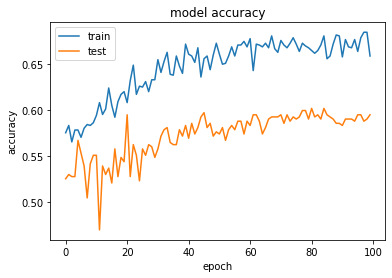

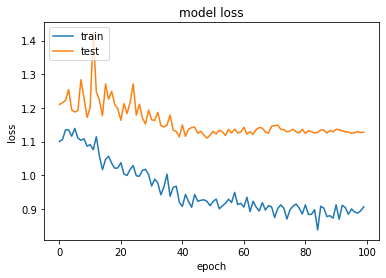

In [29]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

X_train=np.array(X_train)/255
# y_train = to_categorical(lb.fit_transform(y_train),num_classes=8)

X_test=np.array(X_test)/255
# y_test = to_categorical(lb.fit_transform(y_test),num_classes=8)

# X_val=np.array(X_val)/255
# y_val = to_categorical(lb.fit_transform(y_val),num_classes=8)



# y_val=np_utils.to_categorical(lb.fit_transform(y_val))
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
X_test.shape

(432, 224, 224, 3)

In [ ]:
X_train.shape

(1008, 224, 224, 3)

In [ ]:
y_test.shape

(432, 8)

In [ ]:
X_train[90][50]

array([[3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.92156863e-03, 3.92156

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
lb.classes_

array(['Angry', 'Calm', 'Disgust', 'Fearful', 'Happy', 'Neutral', 'Sad',
       'Surprised'], dtype='<U9')

# VGG16

Text(0.5, 1.0, 'Number of training images per category:')

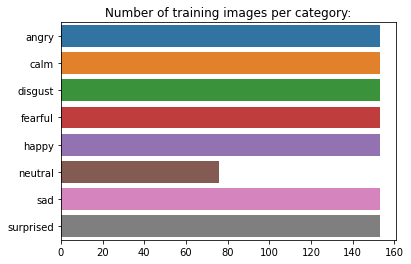

In [ ]:
train_data_dir = "/content/drive/My Drive/logmel/train"
val_data_dir = "/content/drive/My Drive/logmel/validation"
test_data_dir = "/content/drive/My Drive/logmel/test"
category_names = sorted(os.listdir('/content/drive/My Drive/logmel/train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/drive/My Drive/logmel/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
input_shape = (224,224,3)
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', pooling='avg', include_top=False, input_shape = input_shape)

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1efc197898> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1eacf076d8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1eacf079e8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1eacf07908> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1eac6d3b00> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1eb60bef28> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1eb60bee10> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1eb69071d0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1eb6904e48> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1eb6ec4ba8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1eac6b77b8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1ea0d1e

In [ ]:
for layer in conv_base.layers[:19]:
    layer.trainable = False

In [ ]:
for layer in conv_base.layers[:-13]:
    layer.trainable = False

In [ ]:

model = models.Sequential()
model.add(conv_base)
model.add(Flatten()) # Flatten dimensions to for use in FC layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # Dropout layer to reduce overfitting
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.15))

model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))


model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              9

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

#Number of images to load at each iteration
batch_size = 1

# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
val_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":


NameError: ignored

In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
batch_size=1
epochs = 100
checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              shuffle=True, 
                              validation_data=(X_test,y_test),
                              callbacks=[checkpoint]
                              )

Epoch 1/100
1008/1008 [==============================] - ETA: 0s - loss: 2.6754 - acc: 0.1300
Epoch 00001: val_acc did not improve from 0.13426
1008/1008 [==============================] - 11s 11ms/step - loss: 2.6754 - acc: 0.1300 - val_loss: 2.5172 - val_acc: 0.1343
Epoch 2/100
1007/1008 [============================>.] - ETA: 0s - loss: 2.4602 - acc: 0.1301
Epoch 00002: val_acc improved from 0.13426 to 0.13657, saving model to sign_classifier.h5
1008/1008 [==============================] - 12s 12ms/step - loss: 2.4601 - acc: 0.1300 - val_loss: 2.4092 - val_acc: 0.1366
Epoch 3/100
1004/1008 [============================>.] - ETA: 0s - loss: 2.3841 - acc: 0.1275
Epoch 00003: val_acc did not improve from 0.13657
1008/1008 [==============================] - 12s 11ms/step - loss: 2.3843 - acc: 0.1270 - val_loss: 2.3443 - val_acc: 0.1343
Epoch 4/100
1006/1008 [============================>.] - ETA: 0s - loss: 2.3239 - acc: 0.1193
Epoch 00004: val_acc improved from 0.13657 to 0.18056, savi

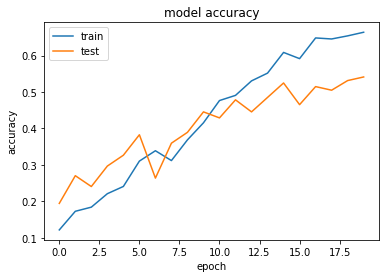

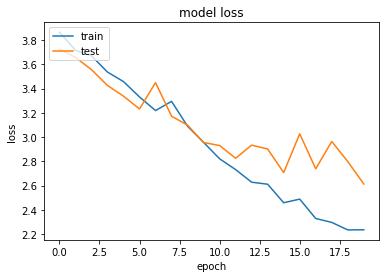

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
model = models.load_model("sign_classifier.h5")


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

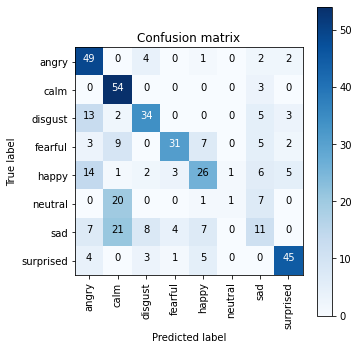

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False
                      , figname = 'Confusion_matrix_concrete.jpg')

NameError: ignored

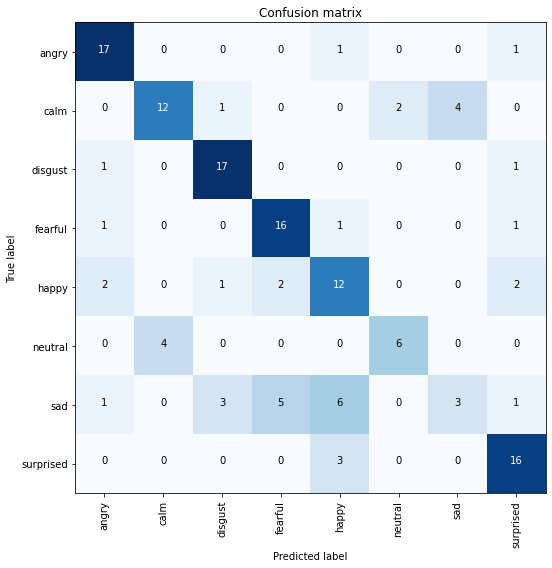

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 69.2% 


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.54      0.84      0.66        58
        calm       0.50      0.95      0.66        57
     disgust       0.67      0.60      0.63        57
     fearful       0.79      0.54      0.65        57
       happy       0.55      0.45      0.50        58
     neutral       0.50      0.03      0.06        29
         sad       0.28      0.19      0.23        58
   surprised       0.79      0.78      0.78        58

    accuracy                           0.58       432
   macro avg       0.58      0.55      0.52       432
weighted avg       0.58      0.58      0.55       432



# VGG 16 Data Augmentation

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=4, horizontal_flip=True, zoom_range=.1)
    
                                  # (zoom_range=0.2, rotation_range=40,
                                  #  width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  #  horizontal_flip=True, fill_mode='nearest')

val_generator = ImageDataGenerator(rotation_range=4, horizontal_flip=True, zoom_range=.1)

# test_generator = ImageDataGenerator(rescale=1./255)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
# test_generator.fit(x_test)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)


In [ ]:
model= Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
model.add(Dropout(0.4))

model.add(Dense(8, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 8200      
Total params: 15,248,200
Trainable params: 533,512
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
epochs = 20
batch_size=1
# checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit(train_generator.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs, 
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = val_generator.flow(X_val, y_val), 
                              callbacks=[lrr], 
                              verbose = 1,
                              shuffle=True
                              )



Epoch 1/20
705/705 [==============================] - 15s 21ms/step - loss: 2.0120 - acc: 0.3135 - val_loss: 1.9943 - val_acc: 0.3201
Epoch 2/20
705/705 [==============================] - 15s 21ms/step - loss: 1.9740 - acc: 0.3418 - val_loss: 1.9789 - val_acc: 0.2937
Epoch 3/20
705/705 [==============================] - 15s 21ms/step - loss: 1.9566 - acc: 0.3248 - val_loss: 1.9730 - val_acc: 0.3432
Epoch 4/20
705/705 [==============================] - 15s 21ms/step - loss: 1.9599 - acc: 0.3603 - val_loss: 1.9526 - val_acc: 0.3300
Epoch 5/20
705/705 [==============================] - 15s 21ms/step - loss: 1.9330 - acc: 0.3603 - val_loss: 1.9185 - val_acc: 0.3861
Epoch 6/20
705/705 [==============================] - 15s 21ms/step - loss: 1.9172 - acc: 0.3262 - val_loss: 1.9299 - val_acc: 0.3432
Epoch 7/20
705/705 [==============================] - 15s 21ms/step - loss: 1.8966 - acc: 0.3518 - val_loss: 1.9211 - val_acc: 0.3432
Epoch 8/20
705/705 [==============================] - 15s 21ms

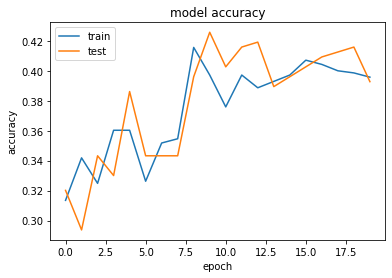

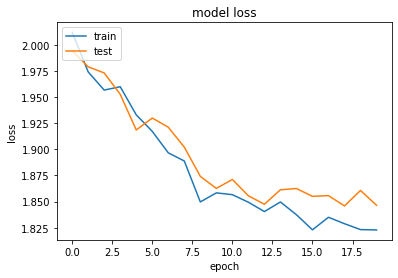

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3 ))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=5e-5),
              metrics=['acc'])
              
# history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
#                               validation_data=val_generator, validation_steps=50, 
#                               verbose=1) 
history = model.fit_generator(train_generator, 
                              epochs=30,
                              steps_per_epoch=len(train_generator)//batch_size,
                              shuffle=True, 
                              validation_data=val_generator) 

Total number of images for "training":


NameError: ignored

In [ ]:
batch_size = 1

# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         rotation_range=20,
#         zoom_range=0.2,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         horizontal_flip=False,
#         brightness_range = (0.9,1.1),
#         fill_mode='nearest'
#         )

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range = (0.9,1.1)
        )

test_datagen =  ImageDataGenerator(
    rescale=1./255
)
val_datagen =  ImageDataGenerator(
    rescale=1./255
)
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data

train_aug = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
save_to_dir='/content/drive/My Drive/augm_images', 
save_prefix='aug', 
save_format='jpg',
class_mode = "categorical")

Found 1147 images belonging to 8 classes.


In [ ]:
model = models.Sequential()
model.add(conv_base)
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.15))

model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_28 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 8200      
Total params: 15,248,200
Trainable params: 9,972,744
Non-trainable params: 5,275,456
_________________________________________________________________


In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate = 5e-5
epochs = 30
checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit_generator(train_aug, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              steps_per_epoch=len(train_aug)//batch_size,
                              callbacks=[checkpoint]
                              )

Epoch 1/30
1147/1147 [==============================] - ETA: 0s - loss: 0.8964 - acc: 0.8474
Epoch 00001: val_acc improved from -inf to 0.68667, saving model to sign_classifier_augm.h5
1147/1147 [==============================] - 48s 42ms/step - loss: 0.8964 - acc: 0.8474 - val_loss: 1.9749 - val_acc: 0.6867
Epoch 2/30
1147/1147 [==============================] - ETA: 0s - loss: 0.5171 - acc: 0.9294
Epoch 00002: val_acc improved from 0.68667 to 0.72000, saving model to sign_classifier_augm.h5
1147/1147 [==============================] - 47s 41ms/step - loss: 0.5171 - acc: 0.9294 - val_loss: 1.9504 - val_acc: 0.7200
Epoch 3/30
1147/1147 [==============================] - ETA: 0s - loss: 0.4534 - acc: 0.9425
Epoch 00003: val_acc did not improve from 0.72000
1147/1147 [==============================] - 47s 41ms/step - loss: 0.4534 - acc: 0.9425 - val_loss: 1.9859 - val_acc: 0.6733
Epoch 4/30
1146/1147 [============================>.] - ETA: 0s - loss: 0.4236 - acc: 0.9459
Epoch 00004: val

KeyboardInterrupt: ignored

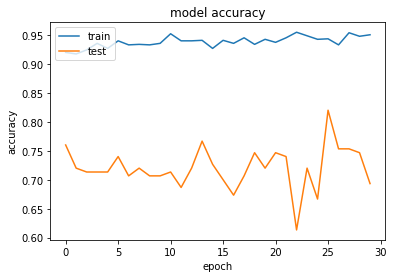

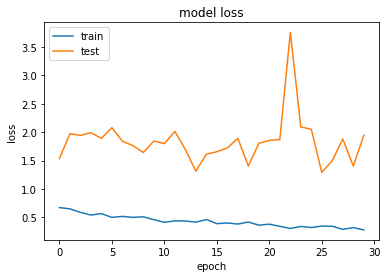

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False
                      , figname = 'Confusion_matrix_concrete.jpg')

Confusion matrix, without normalization


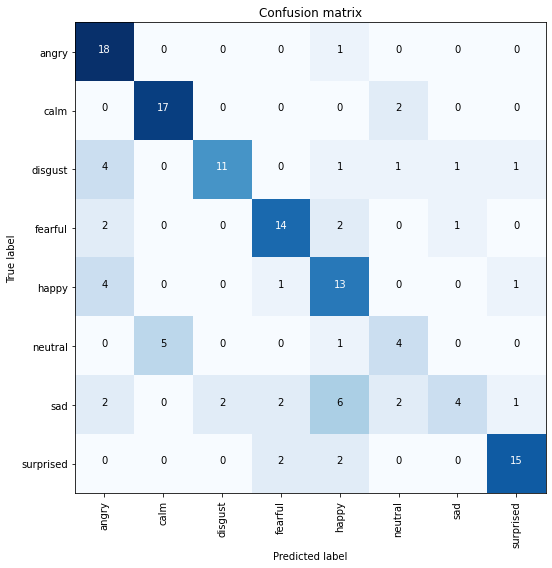

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 67.1% 


# Inception

In [ ]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D


imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False,pooling='avg', input_shape=(224,224,3))

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in imagenet.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2057049208> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f20569a2898> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f2054c6c550> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f2054c6cb70> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2054c6c908> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f204e5e21d0> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f204e5e2588> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f204e5e25c0> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f204e57cac8> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f204e57cf98> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f204e582128> True
<tensorflow.python.keras.layers.convolutiona

In [ ]:
for layer in imagenet.layers[:12]:
    layer.trainable=False

In [ ]:
model = models.Sequential()
model.add(imagenet)
model.add(layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 8200      
Total params: 23,909,160
Trainable params: 23,840,968
Non-trainable params: 68,192
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras import layers, models, Model, optimizers


learning_rate = 5e-5
epochs = 20
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit(X_train,y_train, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=(X_val,y_val),
                              )

Epoch 1/20
23/23 [==============================] - 295s 13s/step - loss: 3.3795 - acc: 0.2340 - val_loss: 3.4098 - val_acc: 0.1980
Epoch 2/20
23/23 [==============================] - 288s 13s/step - loss: 2.7724 - acc: 0.5461 - val_loss: 3.3356 - val_acc: 0.2145
Epoch 3/20
23/23 [==============================] - 291s 13s/step - loss: 2.2229 - acc: 0.8014 - val_loss: 3.1524 - val_acc: 0.3300
Epoch 4/20
23/23 [==============================] - 289s 13s/step - loss: 1.8564 - acc: 0.8936 - val_loss: 3.1104 - val_acc: 0.3696
Epoch 5/20
23/23 [==============================] - 293s 13s/step - loss: 1.6091 - acc: 0.9730 - val_loss: 3.1194 - val_acc: 0.3762
Epoch 6/20
23/23 [==============================] - 289s 13s/step - loss: 1.4933 - acc: 0.9844 - val_loss: 3.0712 - val_acc: 0.3927
Epoch 7/20
23/23 [==============================] - 292s 13s/step - loss: 1.4349 - acc: 0.9957 - val_loss: 2.9904 - val_acc: 0.4290
Epoch 8/20
23/23 [==============================] - 290s 13s/step - loss: 1.

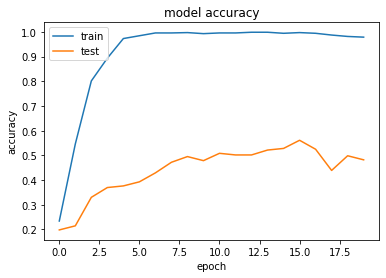

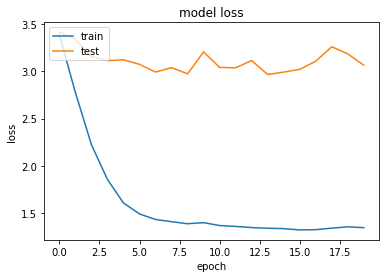

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

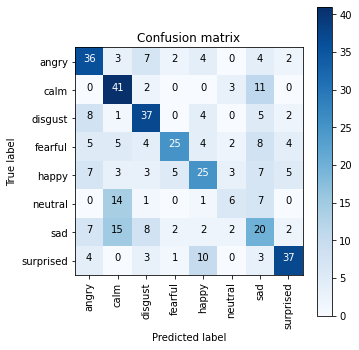

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.54      0.62      0.58        58
        calm       0.50      0.72      0.59        57
     disgust       0.57      0.65      0.61        57
     fearful       0.71      0.44      0.54        57
       happy       0.50      0.43      0.46        58
     neutral       0.38      0.21      0.27        29
         sad       0.31      0.34      0.33        58
   surprised       0.71      0.64      0.67        58

    accuracy                           0.53       432
   macro avg       0.53      0.51      0.51       432
weighted avg       0.54      0.53      0.52       432



#VGG19

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
img_height, img_width = 224,224
conv_base = vgg19.VGG19(weights='imagenet', pooling='avg', include_top=False, input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f0bc4cfa3c8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc3ae8eb8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc3cb79b0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0bc3abb828> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc3aa32b0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc3cb78d0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0bc2236dd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc2236668> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc222cc50> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc2243080> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc2243748> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0bc224c

In [ ]:
for layer in conv_base.layers[:1]:
    layer.trainable = False

In [ ]:
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
# model = models.Sequential()
# model.add(conv_base)
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
# model.summary()

model = models.Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 4104      
Total params: 21,078,600
Trainable params: 1,054,216
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

#Number of images to load at each iteration
batch_size = 1

# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 1147 images belonging to 8 classes.
Total number of images for "validation":
Found 150 images belonging to 8 classes.
Total number of images for "testing":
Found 143 images belonging to 8 classes.


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

batch_size=1
learning_rate = 5e-5
epochs = 40
checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit(X_train, y_train,batch_size=batch_size,
                              epochs=epochs,
                              shuffle=True, 
                              validation_data=(X_val,y_val),
                              callbacks=[checkpoint]
                              )

Epoch 1/40
705/705 [==============================] - ETA: 0s - loss: 3.0525 - acc: 0.1433WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0024s vs `on_test_batch_end` time: 0.0243s). Check your callbacks.

Epoch 00001: val_acc improved from -inf to 0.15182, saving model to sign_classifier.h5
705/705 [==============================] - 30s 42ms/step - loss: 3.0525 - acc: 0.1433 - val_loss: 2.7463 - val_acc: 0.1518
Epoch 2/40
705/705 [==============================] - ETA: 0s - loss: 2.6665 - acc: 0.1574
Epoch 00002: val_acc improved from 0.15182 to 0.19472, saving model to sign_classifier.h5
705/705 [==============================] - 30s 42ms/step - loss: 2.6665 - acc: 0.1574 - val_loss: 2.5909 - val_acc: 0.1947
Epoch 3/40
705/705 [==============================] - ETA: 0s - loss: 2.5361 - acc: 0.2142
Epoch 00003: val_acc improved from 0.19472 to 0.25743, saving model to sign_classifier.h5
705/705 [==============================] 

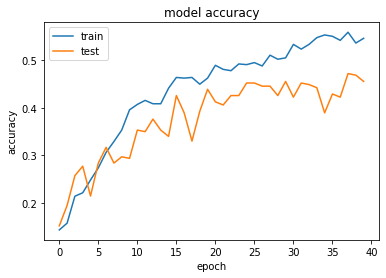

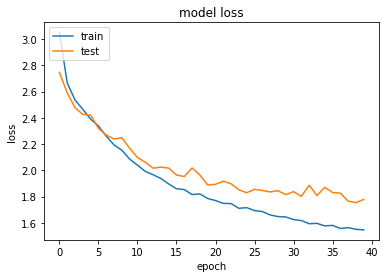

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

# VGG19 Data Augmentation

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=4, horizontal_flip=True, zoom_range=.1)

val_generator = ImageDataGenerator(rotation_range=4, horizontal_flip=True, zoom_range=.1)

# test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
# test_generator.fit(x_test)

from keras.callbacks import ReduceLROnPlateau

lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)


In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f0bc4cfa3c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc3ae8eb8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc3cb79b0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0bc3abb828> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc3aa32b0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc3cb78d0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0bc2236dd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc2236668> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc222cc50> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc2243080> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0bc2243748> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0bc224

In [ ]:
for layer in conv_base.layers[:-12]:
    layer.trainable = False

In [ ]:
model= Sequential()
model.add(conv_base)
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

model.summary()

from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
epochs = 30
batch_size=1
# checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit_generator(train_generator.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = val_generator.flow(X_val, y_val,batch_size=batch_size), 
                              callbacks=[lrr], 
                              verbose = 1,
                              shuffle=True
                              )



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)              

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

# Xception

In [ ]:
from keras.applications import Xception


In [ ]:
#load pre trained Xception model
base_model = Xception(weights='imagenet',pooling='avg', include_top=False, input_shape=(224,224,3))
#Summary of Xception Model
# base_model.summary()

83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications.xception import Xception

input_shape = (224,224,3)
pretrained_model = Xception(input_shape = input_shape,
                weights = 'imagenet',
                include_top = False)
pretrained_model.trainable = False

for layer in pretrained_model.layers:
    layer.trainable = False

# n=20
# for layer in base_model.layers[:n]:
#    layer.trainable = False
# for layer in base_model.layers[n:]:
#    layer.trainable = True

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Dense(8))
model.add(Activation('softmax'))

model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0

In [ ]:
from keras.callbacks import ReduceLROnPlateau
# Setup a callback to save the best model
callbacks = [ 
    ModelCheckpoint('./output/model.features.{epoch:02d}-{val_acc:.2f}.hdf5', 
      monitor='val_acc', verbose=1, save_best_only=True, 
      mode='max', period=1),
             
    ReduceLROnPlateau(monitor='val_loss', verbose=1, 
     factor=0.5, patience=5, min_lr=0.00005)
            ]


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras import layers, models, Model, optimizers
from keras.optimizers import SGD

learning_rate = 5e-5
epochs = 100
batch_size=8

lr=5e-5
opt = SGD(lr=5e-5, momentum=0.9, decay=lr/epochs)
model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics = ['acc'])

In [ ]:
history = model.fit(X_train,y_train, 
                              epochs=epochs, 
                              shuffle=True, 
                              batch_size=batch_size,
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data=(X_test,y_test),
                              callbacks=callbacks
                              )

Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 2.4651 - acc: 0.1399WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0056s vs `on_test_batch_end` time: 0.0342s). Check your callbacks.

Epoch 00001: val_acc improved from -inf to 0.16204, saving model to ./output/model.features.01-0.16.hdf5
126/126 [==============================] - 12s 97ms/step - loss: 2.4651 - acc: 0.1399 - val_loss: 2.0653 - val_acc: 0.1620
Epoch 2/100
126/126 [==============================] - ETA: 0s - loss: 2.0813 - acc: 0.1141
Epoch 00002: val_acc did not improve from 0.16204
126/126 [==============================] - 11s 91ms/step - loss: 2.0813 - acc: 0.1141 - val_loss: 2.0699 - val_acc: 0.1319
Epoch 3/100
126/126 [==============================] - ETA: 0s - loss: 2.0681 - acc: 0.1230
Epoch 00003: val_acc did not improve from 0.16204
126/126 [==============================] - 12s 92ms/step - loss: 2.0681 - acc: 0.1230 - val_loss: 2.

KeyboardInterrupt: ignored

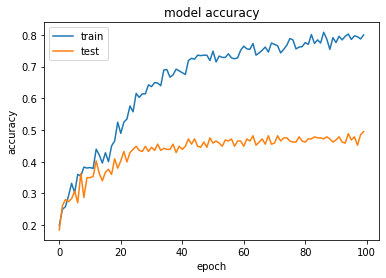

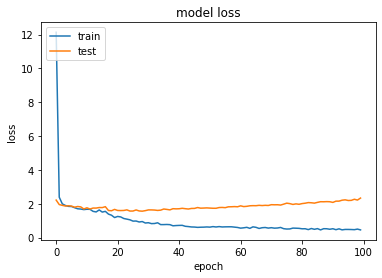

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

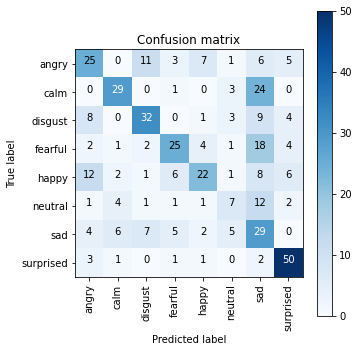

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.45      0.43      0.44        58
        calm       0.67      0.51      0.58        57
     disgust       0.59      0.56      0.58        57
     fearful       0.60      0.44      0.51        57
       happy       0.58      0.38      0.46        58
     neutral       0.33      0.24      0.28        29
         sad       0.27      0.50      0.35        58
   surprised       0.70      0.86      0.78        58

    accuracy                           0.51       432
   macro avg       0.53      0.49      0.50       432
weighted avg       0.54      0.51      0.51       432



# Xception Data Augmentation

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(zoom_range=0.2, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_generator = ImageDataGenerator(zoom_range=0.2, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

# test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
# test_generator.fit(x_test)

# from keras.callbacks import ReduceLROnPlateau

# lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)


for layer in pretrained_model.layers:
    layer.trainable = False

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Dense(8))
model.add(Activation('softmax'))


from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
epochs = 30
batch_size=8
# checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator.flow(X_train, y_train),
                              epochs = epochs, 
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = val_generator.flow(X_val, y_val), 
                              callbacks=callbacks, 
                              verbose = 1,
                              shuffle=True
                              )

Epoch 1/10
22/22 [==============================] - ETA: 0s - loss: 2.0619 - acc: 0.1486
Epoch 00001: val_acc did not improve from 0.15512
22/22 [==============================] - 12s 567ms/step - loss: 2.0619 - acc: 0.1486 - val_loss: 2.0885 - val_acc: 0.1386
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 2.0599 - acc: 0.1441
Epoch 00002: val_acc did not improve from 0.15512
22/22 [==============================] - 12s 537ms/step - loss: 2.0599 - acc: 0.1441 - val_loss: 2.0872 - val_acc: 0.1551
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 2.0604 - acc: 0.1471
Epoch 00003: val_acc did not improve from 0.15512
22/22 [==============================] - 11s 512ms/step - loss: 2.0604 - acc: 0.1471 - val_loss: 2.0828 - val_acc: 0.1353
Epoch 4/10
22/22 [==============================] - ETA: 0s - loss: 2.0634 - acc: 0.1218
Epoch 00004: val_acc did not improve from 0.15512
22/22 [==============================] - 11s 512ms/step - loss: 2.0634 - acc: 

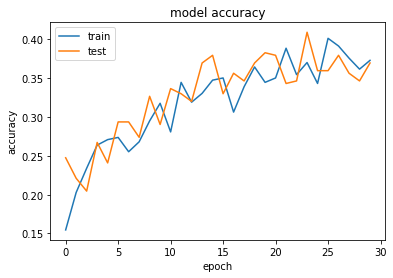

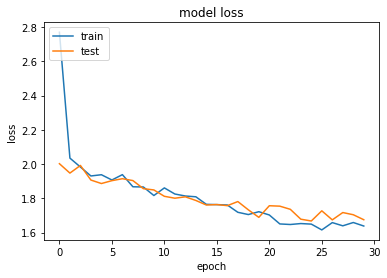

In [ ]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()